In [1]:
# Load packages
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [2]:
# Set seed from random number generator
np.random.seed(20)

In [3]:
# Copy dataset
from google.colab import drive
drive.mount('/content/drive')
!mkdir /content/data
!cp -R "/content/drive/MyDrive/Colab Notebooks/skin-cancer/data" /content

Mounted at /content/drive


# Exploratory Data Analysis

The dataset we are using was made available by the `International Skin Imaging Collaboration (ISIC)` during the *2017 ISIC Challenge on Skin Lesion Analysis Towards Melanoma Detection*. You can find all the data curated by the ISIC [here](https://challenge.isic-archive.com/data/).

We have downloaded the images and organized them in the following matter using the ground truth labels.

```
data
└───train
│   └───melanoma
│   └───nevus
│   └───seborrheic_keratosis 
└───valid
│   └───melanoma
│   └───nevus
│   └───seborrheic_keratosis
└───test
    └───melanoma
    └───nevus
    └───seborrheic_keratosis
```

In [4]:
# Here we collect all the JPEG files contained in the /data directory
%%time
image_files = []
for file in glob("data/**", recursive=True):    
    if file.endswith('.jpg'):
        image_files.append(file)

CPU times: user 25.6 ms, sys: 19.4 ms, total: 45 ms
Wall time: 57 ms


In [5]:
# Here we go through all the images and load them 
%%time
df = pd.DataFrame(columns=('Filename', 'Width', 'Height', 'Label'))
for i, path in enumerate(image_files):
    img = Image.open(path)
    label = path.split('/')[2]
    df.loc[i] = (path, img.width, img.height, label)
    
df.head()

CPU times: user 10.7 s, sys: 273 ms, total: 11 s
Wall time: 14.8 s


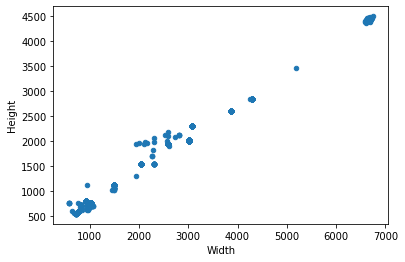

In [6]:
# See how the dimensions are distributed
df.plot.scatter('Width', 'Height');

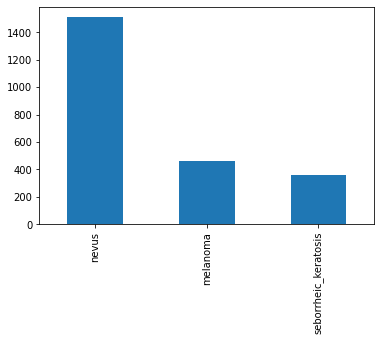

In [7]:
# Distribution of the labels
df['Label'].value_counts().plot.bar();

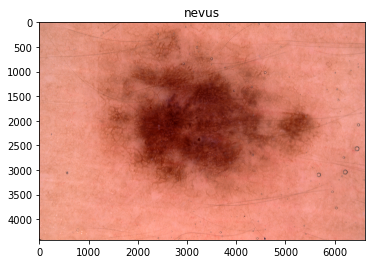

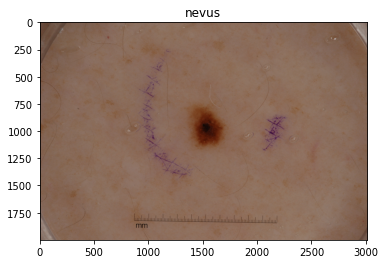

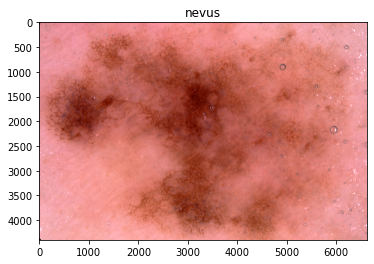

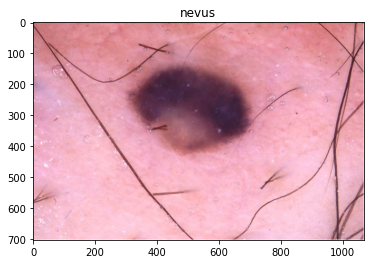

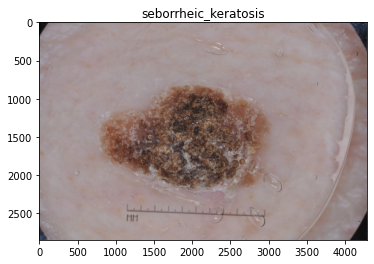

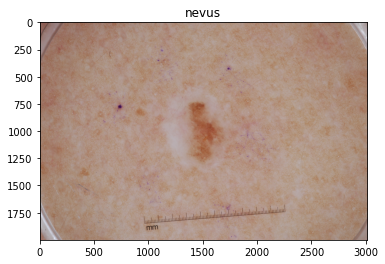

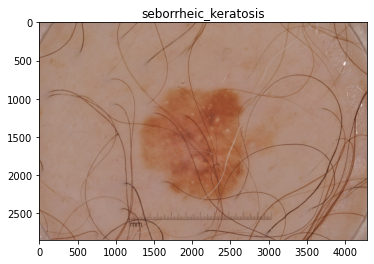

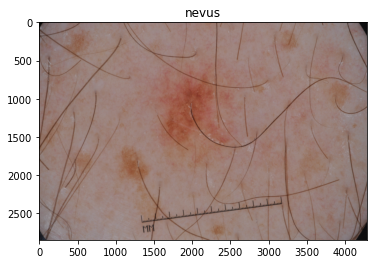

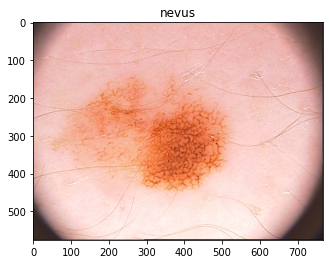

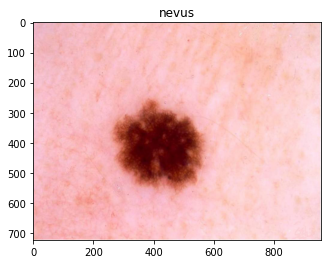

In [8]:
# Print out some amples
for i in range(10):
    path = image_files[np.random.randint(0, len(image_files))]
    img = Image.open(path)
    label = path.split('/')[2]
    plt.figure()
    plt.imshow(img)
    plt.title(label)

> We can see that the suspicious lesions are centered in the field of view of the dermatoscope.